In [1]:
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
import pandas as pd
%matplotlib inline
import statsmodels.formula.api as smf
import patsy


# Hauptkomponentenanalyse - Principal Components Analysis *PCA*

# Einleitung zur PCA
- Linearer Zusammenhang
- Projektion
- Varianz und Kovarianz
- Korrelation
- Lineare (Un-)Abhängigkeit
- Verbundwahrscheinlichkeit
- Beispiele
- Zusammenfassung

# Wiederholung: lineares Modell

$$\qquad\mathcal{E}(Y) = \mathbf{X}\boldsymbol\beta$$
- unabhängige Variable $X$, vorhersagende Variable
    - Designmatrix $\mathbf{X}$
- abhängige Variable $Y$, gemessene Größe
   - Erwartungswert abhängig von vorhersagenden Variablen, Streuung, Meßfehler, Zufall (modellabhängig)


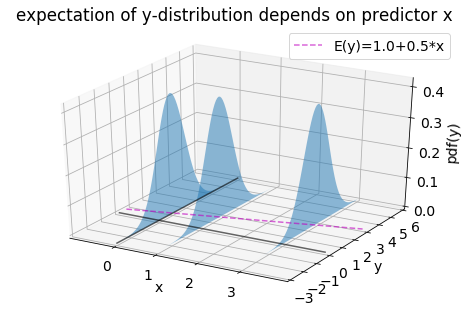

## Beispielsdaten

In [2]:
'''data'''
x = np.asarray([  3. ,   8.,   10. ,   3.,    8.5,  13. ,   7. ,  13.,    5.,   12. ])
y = np.asarray([  9.5,  17.,   26.5,   9.,   18.5,  23.5,  13.5,  30.,   14.,   27. ])
import string
# make a pandas DataFrame
df = pd.DataFrame({ 'name': list(string.ascii_uppercase[:len(x)]),
                    'x': x,                            
                    'y': y  })
print('df:{}'.format(df))


df:  name     x     y
0    A   3.0   9.5
1    B   8.0  17.0
2    C  10.0  26.5
3    D   3.0   9.0
4    E   8.5  18.5
5    F  13.0  23.5
6    G   7.0  13.5
7    H  13.0  30.0
8    I   5.0  14.0
9    J  12.0  27.0


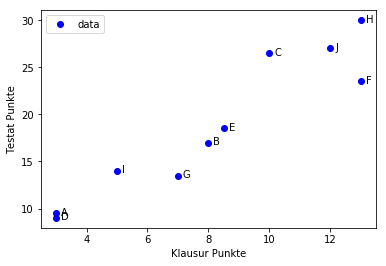

In [3]:
'''just show the data'''
plt.plot(x, y, 'bo', label='data')
plt.xlabel('Klausur Punkte')
plt.ylabel('Testat Punkte')
labels = np.asarray(df['name'])
for li, xi, yi in zip(labels, x, y):
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), textcoords = 'offset points')
plt.legend(loc='upper left');


# Lineare Abhängigkeit  `y~x`

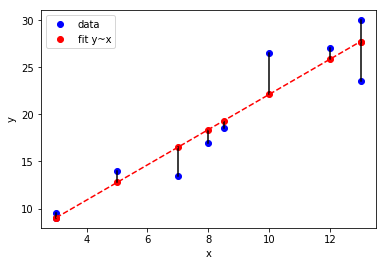

In [15]:
'''same data, together with linear fit y~x'''
fit_yx = smf.glm('y ~ x', df).fit()
plt.plot(x, y, 'bo', label='data')
plt.plot(x, fit_yx.predict(), 'ro', label='fit y~x');
# plt.errorbar(x, y, y-fit_yx.predict(), 'go', fmt='None')
for xi, yi, yfiti in zip(x, y, fit_yx.predict()):
    plt.plot(2*[xi], [yi, yfiti], 'k-');
plt.plot([x.min(), x.max()], [fit_yx.predict().min(),
                              fit_yx.predict().max()], 'r--' );
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc='upper left');


# Lineare Abhängigkeit  `x~y`

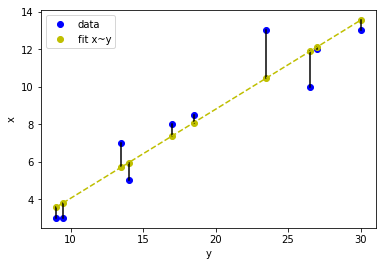

In [16]:
'''same data, linear fit, but reverse x~y'''
fit_xy = smf.glm('x ~ y', df).fit()
plt.plot(y, x, 'bo', label='data')
plt.plot(y, fit_xy.predict(), 'yo', label='fit x~y')
for xi, yi, yfiti in zip(y, x, fit_xy.predict()):
    plt.plot(2*[xi], [yi, yfiti], 'k-')
plt.plot([y.min(), y.max()], [fit_xy.predict().min(), 
                              fit_xy.predict().max()], 'y--' )
plt.xlabel('y')
plt.ylabel('x')
plt.legend(loc='upper left');


## Lineare Abhängigkeit - Vergleich `y~x` oder `x~y`

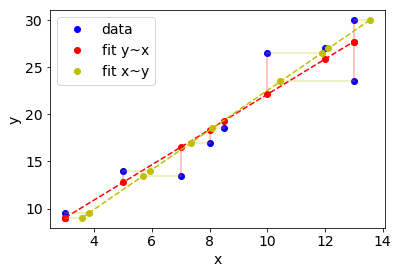

In [7]:
plt.plot(x, y, 'bo', label='data')
plt.plot(x, fit_yx.predict(), 'ro', label='fit y~x')
for xi, yi, yfiti in zip(x, y, fit_yx.predict()):
    plt.plot(2*[xi], [yi, yfiti], 'r-', alpha=.3)
plt.plot([x.min(), x.max()], [fit_yx.predict().min(), 
                              fit_yx.predict().max()], 'r--' )
plt.plot(fit_xy.predict(), y, 'yo', label='fit x~y')
for xi, yi, yfiti in zip(y, x, fit_xy.predict()):
    plt.plot([yi, yfiti], 2*[xi],'y-', alpha=.3)
plt.plot([fit_xy.predict().min(), 
          fit_xy.predict().max()], [y.min(), y.max()], 'y--' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left');


## Ergebnis
ein Lineares Modell ist angemessen, wenn
- Kausale Abhängigkeit bekannt
- Fehler *nur* in abhängiger Variable
## Kausalität
1. $X_2$ wird bestimmt durch $X_1$
2. $X_1$ wird bestimmt durch $X_2$
3. $X_1$ und $X_2$  werden bestimmt durch $X_3$
# Frage
#### Absolute Benotung?
#### Reihenfolge?

Wenn beide Zufallsvariablen gleichberechtigt sind...

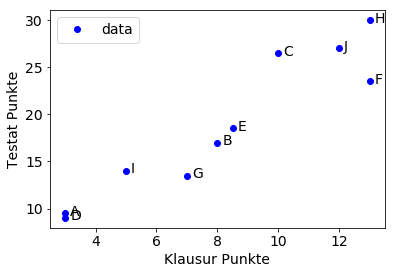

In [8]:
'''just show the data again'''
plt.plot(x, y, 'bo', label='data')
plt.xlabel('Klausur Punkte')
plt.ylabel('Testat Punkte')
labels = np.asarray(df['name'])
for li, xi, yi in zip(labels, x, y):
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.legend(loc='upper left');


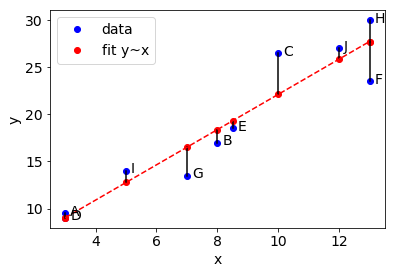

In [9]:
'''order x'''
fit_yx = smf.glm('y ~ x', df).fit()
plt.plot(x, y, 'bo', label='data')
plt.plot(x, fit_yx.predict(), 'ro', label='fit y~x')
for xi, yi, yfiti, li in zip(x, y, fit_yx.predict(), df['name']):
    plt.plot(2*[xi], [yi, yfiti], 'k-')
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.plot([x.min(), x.max()], [fit_yx.predict().min(), 
                              fit_yx.predict().max()], 'r--' )    
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left');


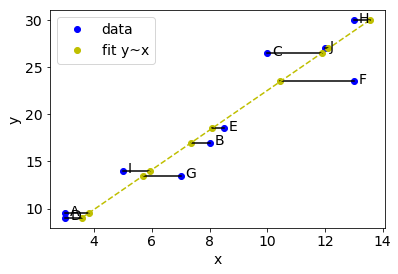

In [10]:
'''order y'''
plt.plot(x, y, 'bo', label='data')
plt.plot(fit_xy.predict(), y, 'yo', label='fit y~x')
for xi, yi, xfiti, li in zip(x, y, fit_xy.predict(), df['name']):
    plt.plot([xi, xfiti], 2*[yi], 'k-')
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.plot([fit_xy.predict().min(), 
          fit_xy.predict().max()], [y.min(), y.max()], 'y--' )    
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left');


In [11]:
xdf = df[['name', 'x', 'y']].copy()
print(xdf.sort_values(by='x', ascending=False))   # either sort for x
print(xdf.sort_values(by='y', ascending=False))   # or for y


  name     x     y
5    F  13.0  23.5
7    H  13.0  30.0
9    J  12.0  27.0
2    C  10.0  26.5
4    E   8.5  18.5
1    B   8.0  17.0
6    G   7.0  13.5
8    I   5.0  14.0
0    A   3.0   9.5
3    D   3.0   9.0
  name     x     y
7    H  13.0  30.0
9    J  12.0  27.0
2    C  10.0  26.5
5    F  13.0  23.5
4    E   8.5  18.5
1    B   8.0  17.0
8    I   5.0  14.0
6    G   7.0  13.5
0    A   3.0   9.5
3    D   3.0   9.0


# Projektion

In [12]:
'''allow matrix multiplication with x-y-coordinates'''
# pack list of (x, y) pairs together in a matrix
XY = np.vstack((x, y)).T
print(XY)


[[  3.    9.5]
 [  8.   17. ]
 [ 10.   26.5]
 [  3.    9. ]
 [  8.5  18.5]
 [ 13.   23.5]
 [  7.   13.5]
 [ 13.   30. ]
 [  5.   14. ]
 [ 12.   27. ]]


In [13]:
'''example: projection onto (1:0)   (like before)'''
phi = 0  # 0 degree or x-only
EV = np.asarray([np.cos(phi), np.sin(phi)])    
print('projecting onto [{:5.3f}, {:5.3f}]'.format(EV[0], EV[1]))
p1 = XY.dot(EV)   # the projection onto the vector
dfp = xdf[['name', 'x', 'y']].copy() # again original data
dfp['p1'] = p1    # now together with new projected data
# sort for new variable, weight x:y same
print(dfp.sort_values(by='p1', ascending=False))


projecting onto [1.000, 0.000]
  name     x     y    p1
5    F  13.0  23.5  13.0
7    H  13.0  30.0  13.0
9    J  12.0  27.0  12.0
2    C  10.0  26.5  10.0
4    E   8.5  18.5   8.5
1    B   8.0  17.0   8.0
6    G   7.0  13.5   7.0
8    I   5.0  14.0   5.0
0    A   3.0   9.5   3.0
3    D   3.0   9.0   3.0


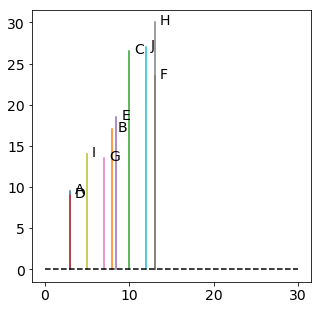

In [14]:
'''show projection onto (1:0)'''
fig = plt.figure(figsize=(5, 5))
for xi, yi, pi, li in zip(dfp['x'], dfp['y'], dfp['p1'], dfp['name']):
    xy1 = pi * EV
    plt.plot([xi, xy1[0]], [yi, xy1[1]])
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.plot([0, 30*EV[0]], [0, 30*EV[1]], 'k--')
plt.xlim=(0, 30)
plt.ylim=(0, 30)
plt.xlabel('x')
plt.ylabel('y');


In [15]:
'''example: projection onto (0:1)   (like before)'''
phi = np.pi/2 # 90 degree or y-only
EV = np.asarray([np.cos(phi), np.sin(phi)])    
print('projecting onto [{:5.3f}, {:5.3f}]'.format(EV[0], EV[1]))
p1 = XY.dot(EV) # the projection onto the vector
dfp = xdf[['name', 'x', 'y']].copy() # again original data
dfp['p1'] = p1 # now together with new projected data
# sort for new variable, weight x:y same 
print(dfp.sort_values(by='p1', ascending=False))


projecting onto [0.000, 1.000]
  name     x     y    p1
7    H  13.0  30.0  30.0
9    J  12.0  27.0  27.0
2    C  10.0  26.5  26.5
5    F  13.0  23.5  23.5
4    E   8.5  18.5  18.5
1    B   8.0  17.0  17.0
8    I   5.0  14.0  14.0
6    G   7.0  13.5  13.5
0    A   3.0   9.5   9.5
3    D   3.0   9.0   9.0


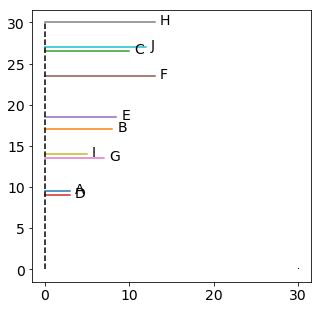

In [16]:
'''show projection onto (0:1)'''
fig = plt.figure(figsize=(5, 5))
for xi, yi, pi, li in zip(dfp['x'], dfp['y'], dfp['p1'], dfp['name']):
    xy1 = pi * EV
    plt.plot([xi, xy1[0]], [yi, xy1[1]])
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.plot([0, 30*EV[0]], [0, 30*EV[1]], 'k--')
plt.plot([30], [0], 'k,')
plt.xlabel('x')
plt.ylabel('y');


In [17]:
'''example: projection onto (1:1)   (like before)'''
# 45 degree or 1:1
phi = np.pi/4
# vector sqrt(2)/2 : sqrt(2)/2
EV = np.asarray([np.cos(phi), np.sin(phi)])
print('projecting onto [{:5.3f}, {:5.3f}]'.format(EV[0], EV[1]))
p1 = XY.dot(EV) # the projection onto the vector
dfp = xdf[['name', 'x', 'y']].copy() # again original data
dfp['p1'] = p1 # now together with new projected data
# sort for new variable, weight x:y same 
print(dfp.sort_values(by='p1', ascending=False))


projecting onto [0.707, 0.707]
  name     x     y         p1
7    H  13.0  30.0  30.405592
9    J  12.0  27.0  27.577164
5    F  13.0  23.5  25.809398
2    C  10.0  26.5  25.809398
4    E   8.5  18.5  19.091883
1    B   8.0  17.0  17.677670
6    G   7.0  13.5  14.495689
8    I   5.0  14.0  13.435029
0    A   3.0   9.5   8.838835
3    D   3.0   9.0   8.485281


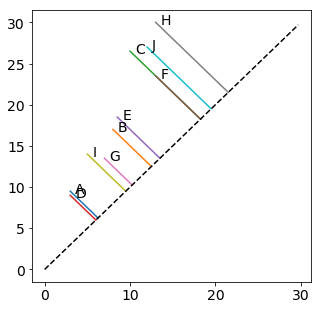

In [18]:
'''show projection onto (1:1)'''
fig = plt.figure(figsize=(5, 5))
for xi, yi, pi, li in zip(dfp['x'], dfp['y'], dfp['p1'], dfp['name']):
    xy1 = pi * EV
    plt.plot([xi, xy1[0]], [yi, xy1[1]])
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.plot([0, 42*EV[0]], [0, 42*EV[1]], 'k--')
plt.xlim=(0, 30)
plt.ylim=(0, 30)
plt.xlabel('x')
plt.ylabel('y');


In [19]:
'''another example: projection onto 60 degree'''
phi = np.pi/3 # 60 degree
EV = np.asarray([np.cos(phi), np.sin(phi)])   # vector 1/2 : sqrt(3)/2
print('projecting onto [{:5.3f}, {:5.3f}]'.format(EV[0], EV[1]))
dfp['p2'] = XY.dot(EV) # the projection onto the vector
print(dfp.sort_values(by='p2', ascending=False)) 


projecting onto [0.500, 0.866]
  name     x     y         p1         p2
7    H  13.0  30.0  30.405592  32.480762
9    J  12.0  27.0  27.577164  29.382686
2    C  10.0  26.5  25.809398  27.949673
5    F  13.0  23.5  25.809398  26.851597
4    E   8.5  18.5  19.091883  20.271470
1    B   8.0  17.0  17.677670  18.722432
6    G   7.0  13.5  14.495689  15.191343
8    I   5.0  14.0  13.435029  14.624356
0    A   3.0   9.5   8.838835   9.727241
3    D   3.0   9.0   8.485281   9.294229


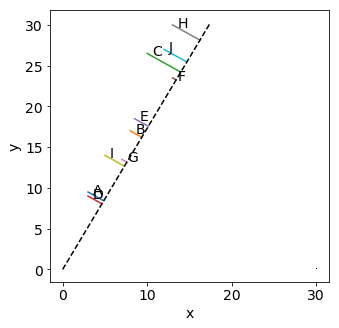

In [20]:
'''show projection onto 60 degree'''
fig = plt.figure(figsize=(5, 5))
for xi, yi, pi, li in zip(dfp['x'], dfp['y'], dfp['p2'], dfp['name']):
    xy1 = pi * EV
    plt.plot([xi, xy1[0]], [yi, xy1[1]])
    plt.annotate(li, xy = (xi, yi), xytext = (5, -2), 
                 textcoords = 'offset points')
plt.plot([0, 35*EV[0]], [0, 35*EV[1]], 'k--')
plt.plot(30, 0, 'k,')
plt.xlabel('x')
plt.ylabel('y');


## Ergebnis Projektion
- Skalarprodukt Vektor $\mathbf{x}$ mit Vektor $\mathbf{e}$ ergibt Koordinate $x'$ in Bezug auf Vektor $\mathbf{e}$
- Koordinate $x'\!\cdot\!\mathbf{e}$ beschreibt Projektion von $\mathbf{x}$ auf $\mathbf{e}$
- Information über zu $\mathbf{e}$ senkrechte Richtung wird ignoriert
# Wiederholung: Varianz

Kennzahl für Streuung einer Variablen
## Empirische Varianz
Für einen Datensatz $X_i$ mit $i \in [1\dots n]$ ist die empirische Varianz
$$\mathrm{Var}(X) = \frac{1}{n}\sum_{i=1}^n (X_i-\overline{X})^2$$
## Varianz einer Zufallsvariablen
Die Varianz ist ein Streuungsmaß der Zufallsvariablen $X$ um ihren Erwartungswert

$$\mathrm{Var}(X) = \mathcal{E}\Bigl( \bigl( X-\mathcal{E}(X)\bigr)^2\Bigr)$$

## Schätzer der Varianz
$S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i-\overline{X})^2\quad$ für die Stichprobenvarianz $Var(X) = \sigma^2$

$\tilde{S}^2 = \frac{1}{n}\sum_{i=1}^n (X_i-\overline{X})^2\quad\;\;\;$ für die empirische Varianz $Var(X) = \sigma^2$

In [21]:
print('Mean of     x={:8.3f} and of y={:8.3f}'.format(x.mean(), y.mean()))
print('Variance of x={:8.3f} and of y={:8.3f}'.format(x.var(ddof=1), y.var(ddof=1)))


Mean of     x=   8.250 and of y=  18.850
Variance of x=  14.403 and of y=  56.781


# Kovarianz
Die Kovarianz zweier verbundener Zufallsvariablen $X_1$ und $X_2$ mit gemeinsamer Verteilung $f(x_1,x_2)$ ist

$$\begin{align}
Cov(X_1,X_2) &= \mathcal{E}\Bigl(\bigl(X_1-\mathcal{E}(X_1)\bigr)\bigl(X_2-\mathcal{E}(X_2)\bigr)\Bigr) \\
 &= \int_{-\infty}^\infty \int_{-\infty}^\infty f_{XY}(x,y)\cdot (x-\mathcal{E}(X))\cdot (y-\mathcal{E}(Y))\;\mathrm{d}y\;\mathrm{d}x
\end{align}$$

$\Rightarrow$ *linearer* Zusammenhang $X_1\sim X_2$

- Kovarianz $\Rightarrow$ linearer Zusammenhang
- Kein linearer Zusammenhang $\Rightarrow$ Kovarianz nahe $0$

In [21]:
xm = x.mean() # calculate deviation around mean
ym = y.mean() # in both directions; then sum and 1/(N-1)
covxy = np.asarray([ (xi-xm)*(yi-ym) for (xi, yi) in zip(x,y)]).sum() / (len(x)-1)
print('Covariance of x and y ={:8.3f}'.format(covxy))


Covariance of x and y =  26.958


nach: Imagecreator, DenisBoigelot; unter: Creative Commons CC0 1.0 Universal Public Domain Dedication


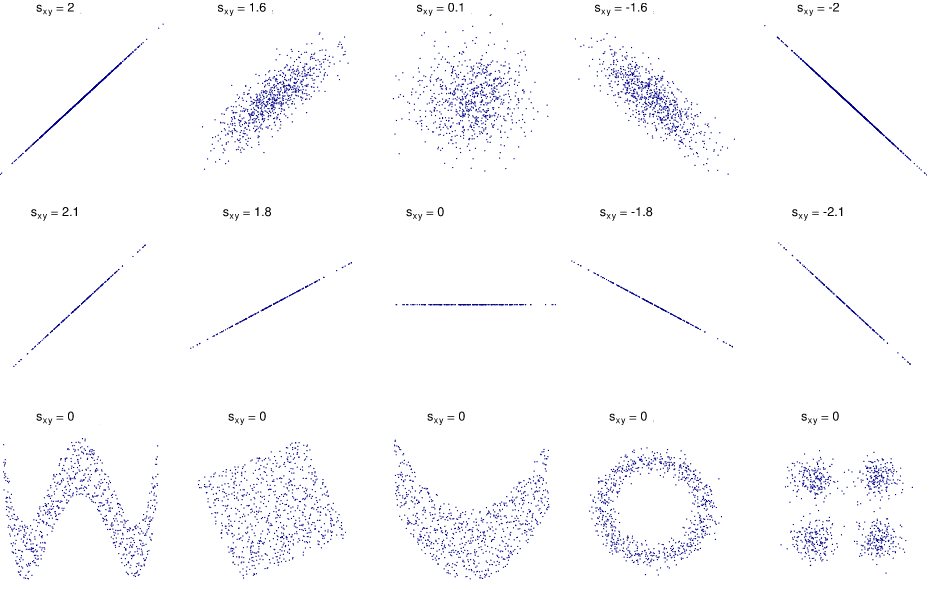

In [22]:
'''covariance'''

## Schätzer der Kovarianz, empirische Kovarianz

$$\widehat{C}_{X_1,X_2} = \frac{1}{n-1}\sum_{i=1}^n \Bigl(\bigl(X_1-\overline{X}_1\bigr)\bigl(X_2-\overline{X}_2\bigr)\Bigr)$$
## Kovarianz-Matrix

von $n$-dimensionaler Zufallsvariable $\mathbf{X}$ und ihrem Erwartungswert $\boldsymbol{\mu}$
$$\mathrm{Cov}(\mathbf{X}) = \mathcal{E}[ (\mathbf{X}-\boldsymbol{\mu})(\mathbf{X}-\boldsymbol{\mu})^T ] = 
\begin{pmatrix} 
\mathrm{Var}(X_1)      & \mathrm{Cov}(X_1,X_2) & \dots  & \mathrm{Cov}(X_1,X_n) \\
\mathrm{Cov}(X_1, X_2) &\mathrm{Var}( X_2)     & \dots  & \mathrm{Cov}(X_2,X_n) \\
\vdots                 &                       & \ddots & \vdots                \\
\mathrm{Cov}(X_1, X_n) & cov(X_2,X_n)          & \dots  & \mathrm{Var}(X_n) 
\end{pmatrix}$$

In [4]:
print('{} covariance matrix of x and y'.format(np.cov(x, y)))


[[14.40277778 26.95833333]
 [26.95833333 56.78055556]] covariance matrix of x and y


## Eigenschaften der Kovarianz
### Verschiebungssatz
$$Cov(X_1,X_2) = \mathcal{E}(X_1\cdot X_2) - \mathcal{E}(X_1)\cdot\mathcal{E}(X_2)$$
### Symmetrie
$$Cov(X_1,X_2) = Cov(X_2,X_1)$$
### Varianzen
$$Var(X_i) = Cov(X_i, X_i)$$
### Unter linearer Transformation
$X_1'=a_1X_1+b_1$ und $X_2'=a_2X_2+b_2$ 
$$Cov(X_1',X_2') = a_1\cdot a_2\cdot Cov(X_1,X_2)$$
### Linearkombination

Sei $$Y = a_1X_1 + a_2X_2 + \dots + a_nX_n$$
Dann ist der Erwartungswert
$$\begin{align}
\mathcal{E}(Y) &= a_1\mathcal{E}(X_1)+a_2\mathcal{E}(X_2)+\dots+a_n\mathcal{E}(X_n) \\
               &= \sum_{i=1}^n a_i\mathcal{E}(X_i)
\end{align}$$
und die Varianz
$$\begin{align}
\mathrm{Var}(Y) &= \mathcal{E}\Bigl(\bigl(Y-\mathcal{E}(Y)\bigr)^2\Bigr) \\
                &= a_1^2 Var(X_1) + a_2^2Var(X_2)+\dots+a_n^2Var(X_n) \\
                &  \qquad + 2a_1a_2Cov(X_1, X_2) + 2a_1a_3Cov(X_1,X_3) + \dots \\
                &= \sum_{i=1}^n a_i^2Var(X_i) + 2\sum_{j=1}^n\sum_{i=1}^{j-1}a_ia_jCov(X_i, X_j) \\
                &= \sum_{j=1}^n\sum_{i=1}^{n}a_ia_jCov(X_i, X_j)
\end{align}$$
#### Erinnerung: 
Bei *unabhängigen* Zufallsvariablen haben sich die Varianzen addiert

## Ergebnis Linearkombination
Die Varianz hängt ab von
- Kovarianzen
- Faktoren der Linearkombination
#  Problemstellung
Welcher Zusammenhang?

#### Lösungsansatz (2-dimensional)
Suche Linearkombination aus $X_1$ und $X_2$, so daß restliche Fehler, Informationsverlust minimal werden
$$Y=\alpha_1X_1 + \alpha_2X_2$$

#### Ziel
- maximale Varianz gewünscht
- minimale Varianz ausblenden
## Annahme: linearer Zusammenhang
Beschränkung auf **eine** Ursache
    - Datenreduktion durch Ersetzung
    - Reduktion der Dimension
    - bei (geringem) Informationsverlust

Erweiterbar auf wenige Ursachen für mehrere Variablen
## Skalierung der Kovarianz

/media/self/develop/branch.git/works/uni/private/fachrichtung/ma/uni_tue_exercise/python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Mean1 =  -0.150	 +1.850	 -0.075	 -0.368
Mean2 =  +0.257	 +3.257	 +0.462	 +0.112
Var1  =  +0.823	 +0.823	 +0.206	 +2.927
Var2  =  +1.995	 +1.995	 +6.464	 +1.195
Cov12 =  +0.083	 +0.083	 +0.074	 -1.580


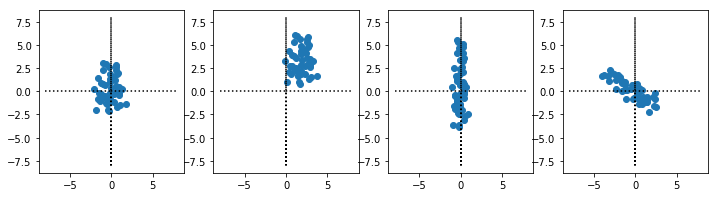

In [6]:
np.random.seed(9876543)
N = 50
I = 4
fig = plt.figure(figsize=(12,3))
fig.add_subplot(142)
X1 = stats.norm(0, 1.0).rvs((I, N))
X2 = stats.norm(0, 1.5).rvs((I, N))
X1[1] = X1[0] + 2    # shift with (2, 3)
X2[1] = X2[0] + 3
X1[2] = 0.5 * X1[0]  # compress
X2[2] = 1.8 * X2[0]  # stretch
X1[3] = 0.8 * X1[2] - 1.2 * X2[0]
X2[3] = 0.9 * X1[2] + 0.7 * X2[0]
E1 = np.zeros(I)
E2 = np.zeros(I)
V1 = np.zeros(I)
V2 = np.zeros(I)
Co = np.zeros(I)
for i in range(I):
    x1 = X1[i]
    x2 = X2[i]
    # print(x1, x2)
    fig.add_subplot(1, 4, i+1)
    plt.scatter(x1, x2)
    E1[i] = x1.mean()
    E2[i] = x2.mean()
    V1[i] = x1.var()
    V2[i] = x2.var()
    Co[i] = np.cov(x1, x2)[0, 1]
    # plt.axis((-8, 8, -8, 8))
    plt.plot([-8, 0, 0, 0, 0, 8], [0, 0, -8, 8, 0, 0], 'k:')

print('Mean1 = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(E1[0], E1[1], E1[2], E1[3]))
print('Mean2 = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(E2[0], E2[1], E2[2], E2[3]))
print('Var1  = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(V1[0], V1[1], V1[2], V1[3]))
print('Var2  = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(V2[0], V2[1], V2[2], V2[3]))  
print('Cov12 = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(Co[0], Co[1], Co[2], Co[3]))


# Korrelation

Gleichberechtigte Variablen

- Gemeinsame Variation: Kovarianz
- Linearer Zusammenhang
## Empirischer Korrelationskoeffizient
$$r_{XY} = \frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum_{i=1}^n (X_i-\bar{X})^2(Y_i-\bar{Y})^2}}$$
## Korrelationskoeffizient
Invariant unter Skalierung
$$\rho = \rho(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}} = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}$$

/media/self/develop/branch.git/works/uni/private/fachrichtung/ma/uni_tue_exercise/python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Mean1 =  -0.150	 +1.850	 -0.075	 -0.368
Mean2 =  +0.257	 +3.257	 +0.462	 +0.112
Var1  =  +0.823	 +0.823	 +0.206	 +2.927
Var2  =  +1.995	 +1.995	 +6.464	 +1.195
Cov   =  +0.083	 +0.083	 +0.074	 -1.580
Corr  =  +0.063	 +0.063	 +0.063	 -0.828


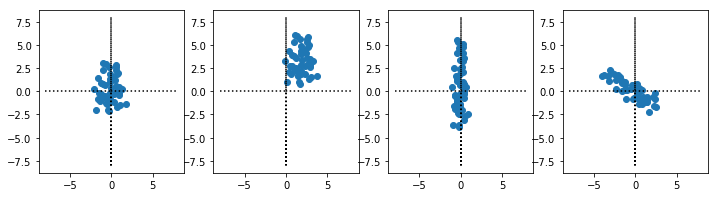

In [8]:
np.random.seed(9876543)
N = 50
I = 4
fig = plt.figure(figsize=(12,3))
fig.add_subplot(142)
X1 = stats.norm(0, 1.0).rvs((I, N))
X2 = stats.norm(0, 1.5).rvs((I, N))
X1[1] = X1[0] + 2    # shift with (2, 3)
X2[1] = X2[0] + 3
X1[2] = 0.5 * X1[0]  # compress
X2[2] = 1.8 * X2[0]  # stretch
X1[3] = 0.8 * X1[2] - 1.2 * X2[0]
X2[3] = 0.9 * X1[2] + 0.7 * X2[0]
E1 = np.zeros(I)
E2 = np.zeros(I)
V1 = np.zeros(I)
V2 = np.zeros(I)
Co = np.zeros(I)
Corr = np.zeros(I)
for i in range(I):
    x1 = X1[i]
    x2 = X2[i]
    # print(x1, x2)
    fig.add_subplot(1, 4, i+1)
    plt.scatter(x1, x2)
    E1[i] = x1.mean()
    E2[i] = x2.mean()
    V1[i] = x1.var()
    V2[i] = x2.var()
    Co[i] = np.cov(x1, x2)[0, 1]
    Corr[i], p = stats.pearsonr(x1, x2)     # easiest way to get correlation coefficient
    # plt.axis((-8, 8, -8, 8))
    plt.plot([-8, 0, 0, 0, 0, 8], [0, 0, -8, 8, 0, 0], 'k:')

print('Mean1 = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(E1[0], E1[1], E1[2], E1[3]))
print('Mean2 = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(E2[0], E2[1], E2[2], E2[3]))
print('Var1  = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(V1[0], V1[1], V1[2], V1[3]))
print('Var2  = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(V2[0], V2[1], V2[2], V2[3]))  
print('Cov   = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(Co[0], Co[1], Co[2], Co[3]))
print('Corr  = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(Corr[0], Corr[1], Corr[2], Corr[3]))


nach: Imagecreator, DenisBoigelot; unter: Creative Commons CC0 1.0 Universal Public Domain Dedication


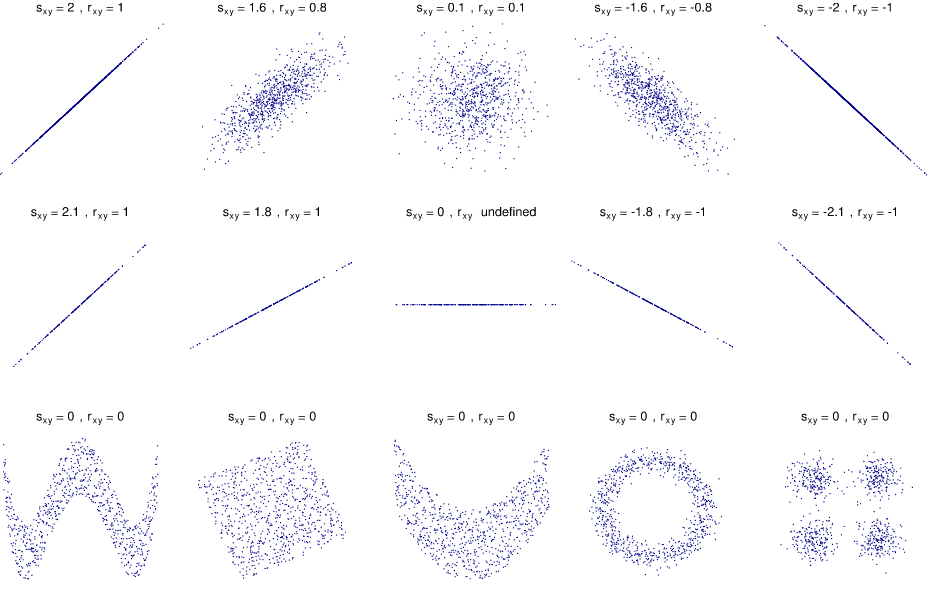

In [26]:
'''covariance and correlation'''

## Korrelationstest

Seien $(X_i, \;Y_i)\quad i\in\{1\dots n\}$ unabhänge, gemeinsam normalverteilte Zufallsvariablen. 

### Nullhypothese: *unabhängig*,  *unkorreliert*
(a)
$$H_0: \quad \rho_{XY} = 0 \qquad H_1: \quad \rho_{XY} \neq 0 $$
(b)
$$H_0: \quad \rho_{XY} \geq 0 \qquad H_1: \quad \rho_{XY} < 0 $$
(c)
$$H_0: \quad \rho_{XY} \leq 0 \qquad H_1: \quad \rho_{XY} > 0 $$

#### Teststatistik
$$T = \frac{r_{XY}}{\sqrt{1-r^2_{XY}}}\sqrt{n-2}$$

#### Verteilung
unter $\rho_{XY}=0$
$$ T \sim t(n-2)$$

#### Ablehnungsbereich
(a)
$$|T| > t_{1-\alpha/2(n-2)}$$
(b)
$$T < -t_{1-\alpha(n-2)}$$
(c)
$$T > t_{1-\alpha(n-2)}$$

In [27]:
p = np.zeros(I)
for i in range(I):
    x1 = X1[i]
    x2 = X2[i]
    Corr[i], p[i] = stats.pearsonr(x1, x2)
print('Corr    = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(Corr[0], Corr[1], Corr[2], Corr[3]))
print('p-value = {:+7.3f}\t{:+7.3f}\t{:+7.3f}\t{:+7.3f}'
      .format(p[0], p[1], p[2], p[3]))


Corr    =  +0.063            +0.063                +0.063                  -0.828
p-value =  +0.663            +0.663                +0.663                  +0.000


## Allgemeine Nullhypothese
(a)
$$H_0: \quad \rho_{XY} = \rho_0 \qquad H_1: \quad \rho_{XY} \neq \rho_0 $$
(b)
$$H_0: \quad \rho_{XY} \geq \rho_0 \qquad H_1: \quad \rho_{XY} < \rho_0 $$
(c)
$$H_0: \quad \rho_{XY} \leq \rho_0 \qquad H_1: \quad \rho_{XY} > \rho_0 $$

#### Teststatistik
$$Z = \frac{1}{2}(ln\frac{1+r_{XY}}{1-r_{XY}} -ln\frac{1+\rho_0}{1-\rho_0})\sqrt{n-3}$$

#### Verteilung
unter $\rho_{XY}=\rho_0$ approximativ (n>25)
$$ Z \sim \mathcal{N}(0, 1)$$

#### Ablehnungsbereich
(a)
$$|Z| > z_{1-\alpha/2}$$
(b)
$$Z < -z_{1-\alpha}$$
(c)
$$Z > z_{1-\alpha}$$

# Zweidimensionale *Normal*verteilung

Mit den Parametern

$\qquad\mu_x = \mathcal{E}(X)$

$\qquad\mu_y = \mathcal{E}(Y)$

$\qquad\sigma_x^2 = Var(X)$

$\qquad\sigma_y^2 = Var(Y)$

$\qquad\rho = \frac{Cov(X,Y)}{\sigma_x\sigma_y}$

ergibt sich
$$f(x,y) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}exp\{\text{arg}\} $$
mit
$$\text{arg} = -\frac{1}{2(1-\rho^2)} [ (\frac{x-\mu_x}{\sigma_x})^2 + 2\rho\frac{x-\mu_x}{\sigma_x}\frac{y-\mu_y}{\sigma_y} + (\frac{y-\mu_y}{\sigma_y})^2 ]$$

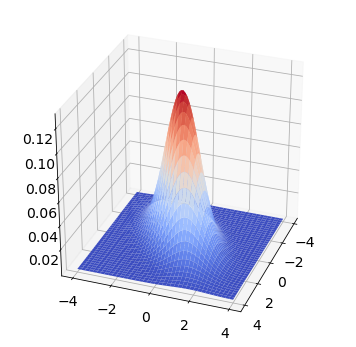

In [28]:
from matplotlib import cm  # allows color maps
from mpl_toolkits.mplot3d.axes3d import Axes3D # allows 3D to 2D projection
x = y = np.linspace(-4, 4, 201) # the two dimensions of the 
X, Y = np.meshgrid(x, y)        # complete 2D grid
rho = 0.8                       # defines the correlation between x and y
mu1, mu2 = (0., 0.)             # distribution is centralized
sigma1, sigma2 = (1.8, 1.2)     # variance differs between x and y
gauss = stats.multivariate_normal(mean=[mu2, mu1], cov=[[sigma2,rho],[rho,sigma1]])
Z = np.zeros_like(X)            # initialize probability density
for i, xx in enumerate(x):
    for j, yy in enumerate(y):
        # probability density from frozen distribution above
        Z[i,j] = gauss.pdf([xx,yy])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=1, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=20)


# Unabhängigkeit
Für gemeinsam **normal**verteilte Zufallsvariablen X und Y gilt

#### X und Y sind unabhängig *genau* dann, wenn sie unkorreliert sind


## Höherdimensionale Normalverteilung
Analog mittels Kovarianzmatrix. Jedoch unanschaulich.

# Beispiel-Datensatz

#### *Säugetiere*

    Species          BodyWt   BrainWt   NonDream  Dreaming  TSleep  LifeSpan [...]
    Africanelephant  6654     5712       NA       NA         3.3    38.6
    Afgiantp-rat        1        6.6     6.3       2         8.3     4.5
    ArcticFox           3.3     44.5     NA       NA        12.5    14
    Man                62     1320       6.1       1.9       8     100
    Ls-tailedshrew      0.005    0.14    7.7       1.4       9.1     2.6
    Wateropossum        3.5      3.9    12.8       6.6      19.4     3
    [...]

In [29]:
'''animal example'''
import pandas as pd
animals = pd.read_csv('data/animals.txt', sep='\t')  # read data
animals.info() # show summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
Species        62 non-null object
BodyWt         62 non-null float64
BrainWt        62 non-null float64
NonDreaming    48 non-null float64
Dreaming       50 non-null float64
TotalSleep     58 non-null float64
LifeSpan       58 non-null float64
Gestation      58 non-null float64
Predation      62 non-null int64
Exposure       62 non-null int64
Danger         62 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.4+ KB


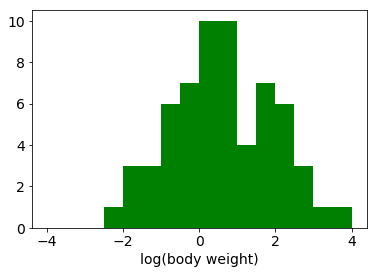

In [30]:
animals['log_BodyWt'] = np.log10(animals['BodyWt'])
x1 = np.asarray(animals['log_BodyWt'])
plt.hist(x1, np.linspace(-4, 4, 17), color='green')
plt.xlabel('log(body weight)');


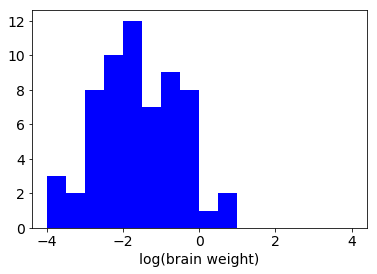

In [31]:
animals['log_BrainWt'] = np.log10(animals['BrainWt'])-3  # g -> kg
x2 = np.asarray(animals['log_BrainWt'])
plt.hist(x2, np.linspace(-4, 4, 17), color='blue')
plt.xlabel('log(brain weight)');


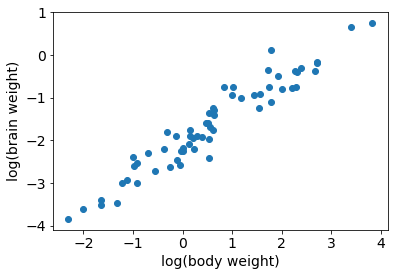

In [32]:
plt.scatter(x1, x2)
plt.xlabel('log(body weight)')
plt.ylabel('log(brain weight)');


In [33]:
print('log(brain-weight) and log(body-weight) have covariance of {:.2f}'
      .format(np.cov(x1, x2)[0, 1]))


log(brain-weight) and log(body-weight) have covariance of 1.38


In [34]:
cc, p = stats.pearsonr(x1, x2)
print('log(brain-weight) and log(body-weight) are correlated with C={:.2f} (p={:.5f})'
      .format(cc, p))


log(brain-weight) and log(body-weight) are correlated with C=0.96 (p=0.00000)


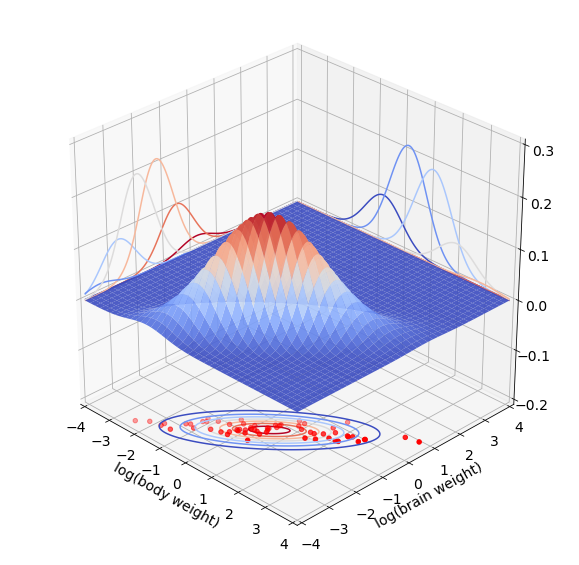

In [35]:
x = y = np.linspace(-4, 4, 201)
X, Y = np.meshgrid(x, y)
rho = cc
mu1, mu2 = (x1.mean(), x2.mean())
sigma1, sigma2 = (x1.std(), x2.std())
gauss = stats.multivariate_normal(mean=[mu2, mu1], cov=[[sigma2,rho],[rho,sigma1]])
Z = np.zeros_like(X)
for i, xx in enumerate(x):
    for j, yy in enumerate(y):
        Z[i,j] = gauss.pdf([xx,yy])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=.9, cmap=cm.coolwarm)
ax.set_xlabel('log(body weight)')
ax.set_ylabel('log(brain weight)')
ax.scatter(x1, x2, -.2*np.ones_like(x1), c='r', marker='o')
ax.view_init(elev=30, azim=-45)
ax.axis((-4, 4, -4, 4))
ax.set_zlim(-0.2, 0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)


# Zusammenfassung
- Gleichberechtigte Variablen 

#### Kovarianz
$$Cov(X_1, X_2) = \mathcal{E}\Bigl(\bigl(X_1-\mathcal{E}(X_1)\bigr)\bigl(X_2-\mathcal{E}(X_2)\bigr)\Bigr)$$
- Kennzahl für *linearen Zusammenhang* 
    - "je-desto"
    - Gewichtung in Quadranten

#### Schätzer der Kovarianz
$$\widehat{C}_{X_1,X_2} = \frac{1}{n-1}\sum_{i=1}^n \Bigl(\bigl(X_1-\overline{X}_1\bigr)\bigl(X_2-\overline{X}_2\bigr)\Bigr)$$

#### Skalierung unter linearer Transformation
$$\begin{align}
X_1' &=a_1X_1+b_1 \;,\quad X_2'=a_2X_2+b_2 \\
Cov(X_1',X_2') &= a_1\cdot a_2\cdot Cov(X_1,X_2)
\end{align}$$
- Varianzen sind Diagonalelemente der Kovarianzmatrix

#### Linearkombination
$$\begin{align}
Y &= \sum_{i=1}^n a_i X_i \\
\mathcal{E}(Y) &= \sum_{i=1}^n a_i\mathcal{E}(X_i) \\
\mathrm{Var}(Y) &= \sum_{j=1}^n\sum_{i=1}^{n}a_ia_jCov(X_i, X_j)
\end{align}$$
- ... insbesondere abhängig von den Faktoren der Linearkombination 

#### Korrelationskoeffizient
$$\rho(X_1, X_2) = \frac{Cov(X_1, X_2)}{\sigma_{X_1}\sigma_{X_2}}$$
- Invariant unter Skalierung

#### Lineare Unabhängigkeit
- Stochastisch unabhängig $\Rightarrow$ Korrelation $\rho=0$
- Linear unabhängig $\Leftrightarrow$ Korrelation $\rho=0$
- Normalverteilte Zufallsvariablen: stochastisch unabhängig $\Leftrightarrow$ Korrelation $\rho=0$

# Ausblick
### Lösungsansatz
Suche Linearkombination aus gleichberechtigten Zufallsvariablen $X_i$, so daß restliche Fehler bzw. der Informationsverlust minimal werden
$$Y=\sum_i\alpha_iX_i$$

#### Ziel
- maximale Varianz erhalten
- minimale Varianz ausblenden